# 结果可视化

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')  #风格设置近似R这种的ggplot库
import seaborn as sns
sns.set_style('whitegrid')

def drawpearson(data):
    colormap = plt.cm.viridis
    plt.figure(figsize=(12,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(
        data[data.columns].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

> ## 特征选择

### 皮尔逊相关性

In [22]:
import numpy as np
import pingouin as pg

np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T
x=np.arange(15)
y=x*3
print(pg.corr(x, y))
x=np.arange(15)
y=x**3
print(pg.corr(x, y))

          n    r       CI95%  p-val BF10  power
pearson  15  1.0  [1.0, 1.0]    0.0  inf      1
          n         r         CI95%     p-val      BF10     power
pearson  15  0.910622  [0.75, 0.97]  0.000002  6952.199  0.999718


### 鲁棒检验

In [11]:
#添加一个异常值
x[5] = 18
#使用Shepherd's pi correlation
pg.corr(x, y, method="shepherd")
import pingouin as pg
df = pg.read_dataset('partial_corr')
pg.partial_corr(data=df, x='x', y='y', covar='cv1').round(3)

,n,r,CI95%,p-val
pearson,30,0.568,"[0.25, 0.77]",0.001


### 离散变量自相关性

In [1]:
import statsmodels.tsa.api as smt


time_series = [2, 3, 4, 3, 7]
acf = smt.stattools.acf(time_series)
print(acf)

[ 1.         -0.0972973   0.06216216 -0.07567568 -0.38918919]


D:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
D:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


### 线性互相关

In [24]:
import numpy as np
from scipy import signal
a=[1,2,3,4,5,6,7,8]
v=[2,3,6,4,5,6]

'''
mode = ‘valid’：只返回有效的那一部分相关数据，共M-N+1个；
mode = ‘same’：只返回与等长的那一部分相关数据，共N个；
mode = ‘full’：返回全部相关数据，共M+N-1个。
'''
#以下两个方式调用参数完全相同。在调用时有三种模式可供选择，它们计算的内容是相同的，但是返回值长度各不相同：
print('len a=%d,len v=%d'%(len(a),len(v)))
for mode in ['valid','same','full']:
    print(np.correlate(a, v, mode),len(np.correlate(a, v, mode)))
    print(signal.correlate(a, v, mode))


len a=8,len v=6
[103 129 155] 3
[103 129 155]
[ 32  53  77 103 129 155 127 102] 8
[ 32  53  77 103 129 155 127 102]
[  6  17  32  53  77 103 129 155 127 102  81  38  16] 13
[  6  17  32  53  77 103 129 155 127 102  81  38  16]


### SequentialFeatureSelector

In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.data import wine_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = wine_data()
X_train, X_test, y_train, y_test= train_test_split(X, y, 
                                                   stratify=y,
                                                   test_size=0.3,
                                                   random_state=1)
std = StandardScaler()
X_train_std = std.fit_transform(X_train)

knn = KNeighborsClassifier(n_neighbors=3)    # ①
sfs = SFS(estimator=knn,     # ②
           k_features=4,
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs.fit(X_train_std, y_train)
sfs.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2021-11-21 12:34:48] Features: 1/4 -- score: 0.8629032258064516[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2021-11-21 12:34:48] Features: 2/4 -- score: 0.9596774193548387[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-11-21 12:34:48] Features: 3/4 -- score: 0.9919354838709677[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

{1: {'feature_idx': (6,),
  'cv_scores': array([0.86290323]),
  'avg_score': 0.8629032258064516,
  'feature_names': ('6',)},
 2: {'feature_idx': (6, 9),
  'cv_scores': array([0.95967742]),
  'avg_score': 0.9596774193548387,
  'feature_names': ('6', '9')},
 3: {'feature_idx': (6, 9, 11),
  'cv_scores': array([0.99193548]),
  'avg_score': 0.9919354838709677,
  'feature_names': ('6', '9', '11')},
 4: {'feature_idx': (6, 8, 9, 11),
  'cv_scores': array([0.98387097]),
  'avg_score': 0.9838709677419355,
  'feature_names': ('6', '8', '9', '11')}}

### 低方差滤波器

In [1]:
def LowVarianceFilter(data,feature_column,n_components=-1):
    df=data[feature_column]
    #归一化
    df=df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))) 
    var=df.var()#/np.mean(df)
    #print(var)
    sort_var=sorted(enumerate(var),key=lambda x:x[1],reverse=True)
    cols=[feature_column[it[0]] for it in sort_var][:n_components]
    print(var[cols])
    return cols

In [2]:
#使用VarianceThreshold类进行方差过滤
from sklearn.feature_selection import VarianceThreshold
def LowVarianceFilter2(data,feature_column,score_column,n_components=-1):
    #要生成这个类的对象，就需要一个参数，就是最小方差的阈值，我们先设置为1，然后调用它的transform方法进行特征值的过滤
    variancethreshold=VarianceThreshold(threshold=300)
    variancethreshold.fit_transform(data[feature_column],data[score_column])
    #使用get_support方法，可以得到选择特征列的序号，然后根据这个序号在原始数据中把对应的列名选择出来即可
    cols=feature_column[variancethreshold.get_support()].tolist()
    print(cols)
    return cols


### 高相关性滤波器

In [3]:
#高相关滤波（High Correlation filter）,过滤指标，传入数据喝需要计算的列，如果两个变量之间是高度相关的，这意味着它们具有相似的趋势并且可能携带类似的信息。
def HighCorrelationFilter(data,feature_column,n_components=-1):
    #计算每个指标的方差
    corr = data.loc[:, feature_column].corr()
    #print(corr)
    corr=corr**2
    cor_dict={}
    for it in feature_column:
        cor_dict[it]=0
    for i in feature_column:
        for j in feature_column:
            cor_dict[i]+=corr[i][j]
    sort_cor= sorted(cor_dict.items(),key=lambda x:x[1],reverse=False)[:n_components]
    cols=[it[0] for it in sort_cor]
    print(cols)
    return cols

### 相关系数法

先计算各个特征对目标值的相关系数，选择更加相关的特征。

In [4]:
#SelectKBest类，通过回归的方法，以及要选择多少个特征值，新建一个 SelectKBest对象，
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
def SelectBestFeature(data,feature_column,score_column,n_components=-1):
    if n_components==-1:
        n_components=len(feature_column)
    selectKBest = SelectKBest(
        f_regression,k=n_components
    )
    #接着，把自变量选择出来，然后调用fit_transform方法，把自变量和因变量传入，即可选出相关度最高的变量。
    bestFeature =selectKBest.fit_transform(
        data[feature_column],
        data[score_column]
    )
    #我们想要知道选出的自变量的名字，使用get_support方法即可得到相应的列名
    cols=feature_column[selectKBest.get_support()].tolist()
    print(cols)
    return cols

### 模型选择法

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
def SelectFeatureFromModel(data,feature_column,score_column):
    #lrModel =LinearRegression()
    lrModel=GradientBoostingClassifier(n_estimators=200)
    selectFromModel = SelectFromModel(lrModel)
    selectFromModel.fit_transform(data[feature_column],data[score_column])
    #我们想要知道选出的自变量的名字，使用get_support方法即可得到相应的列名
    cols=feature_column[selectFromModel.get_support()].tolist()
    print(cols)
    return cols

### 随机森林
是一个广泛使用的特征选择算法，该算法可以计算出每个特征变量的重要性，从而我们可以舍弃重要性低的变量达到将为的目的。

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
def GetFeatureByRandomForest(data,feature_column,score_column,n_components=-1):
    model = RandomForestClassifier(random_state=1, max_depth=10)
    #train=pd.get_dummies(train)
    #print(train)
    model.fit(data[feature_column],data[score_column])
    #plot the feature importance graph
    importances = model.feature_importances_
    indices = np.argsort(importances) 
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_column[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    # use the SelectFromModel to selects the features 
    feature = SelectFromModel(model)
    fit = feature.fit_transform(data[feature_column],data[score_column])
    column_num = fit.shape[1]
    #np.argsort(x) #按升序排列 np.argsort(-x) #按降序排列 取索引
    indices = np.argsort(-importances)
    cols=feature_column[indices][:n_components].tolist()
    auto_select__columns = []
    for c in range(column_num):
        auto_select__columns.append(feature_column[indices[c]])
    print(cols)
    print(auto_select__columns)
    return cols,auto_select__columns

### 反向特征消除
先将所有变量用于模型训练，然后在分别去掉其中一个变量再进行训练，如果训练的效果好则舍弃该变量。该方法一般用于构造线性回归或者Logistic回归。

In [7]:
# 导入RFE方法和线性回归基模型
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso
def BackwardFeatureSelection(data,feature_column,score_column,n_components=-1):
    if n_components==-1:
        n_components=len(feature_column)
    lreg = Ridge(alpha=100000, fit_intercept=True, normalize=True,
               copy_X=True, max_iter=1500, tol=1e-4, solver='auto')
    #lreg = LinearRegression()  # 选择lin线性回归为基模型
    rfe = RFE(
        #estimator=LinearRegression(normalize=True),
        #estimator=Lasso(normalize=True),
        estimator=lreg,
        #n_features_to_select=28  # 选区特征数
        n_features_to_select = n_components  # 选区特征数
    )
    # fit 方法训练选择特征属性
    #sFeature = rfe.fit_transform(feature, data["RON损失（不是变量）"])
    sFeature = rfe.fit_transform(data[feature_column], data[score_column])

    # 2d matrix: clonum: opt Value, row:
    FRMatrix = sFeature.tolist()
    print(rfe.get_support(), "type is: ", type(rfe.get_support()))
    chosenFlags = rfe.get_support().tolist()
    #print(chosenFlags)
    cols=feature_column[rfe.get_support()].tolist()
    print(cols) #查看满足条件的属性
    return cols


### 前向特征选择（Forward Feature Selection）
前向特征选择其实就是反向特征消除的相反过程，即找到能改善模型性能的最佳特征，而不是删除弱影响特征。

In [8]:
from sklearn.feature_selection import f_regression
# 前向特征选择（Forward Feature Selection）前向特征选择其实就是反向特征消除的相反过程，即找到能改善模型性能的最佳特征
def ForwardFeatureSelection(data,index_column,score_column,n_components=-1):
    df = data.loc[:, index_column]
    score_df = data.loc[:, score_column]
    #F值越大，p值越小越好，这里我们选择F值大于10的变量
    ffs = f_regression(df,score_df )
    ffs_dict={}
    new_columns = []
    for i in range(len(df.columns)):
        ffs_dict[df.columns[i]]=ffs[0][i]
    ffs_result=sorted(ffs_dict.items(),key=lambda x:x[1],reverse=True)[:n_components]
    cols=[it[0] for it in ffs_result]
    print(cols)
    return cols

># 数据降维 

### 因子分析（Factor Analysis）

In [9]:
from sklearn.decomposition import FactorAnalysis
# 因子分析（Factor Analysis），返回降维后的新数据
def FactorAnalysisFeatureSelection(data,index_column,n_components=3):
    df = data.loc[:, index_column]
    fa = FactorAnalysis(n_components=n_components)  # 指定7个因子作为新变量
    fa.fit(df)
    tran_x = fa.transform(df)
    factor_columns = []
    for index in range(n_components):
        tmp = "factor" + str(index + 1)
        factor_columns.append(tmp)
    tran_df = pd.DataFrame(tran_x, columns=factor_columns)
    return tran_df

## 基于核函数的非线性降维方法：
### 核 PCA（Kernel PCA）
KPCA其实是先采用增加多项式等方式提高了数据的维度，再使用标准PCA，寻找一个可以进行有效分类的方向进行投影降维。

from sklearn.decomposition import KernelPCA rbf_pca=KernelPCA(n_components=2,kernel='rbf',gamma=0.04) X_reduced=rbf_pca.fit_transform(X)

调整超参数： 由于 kPCA 是无监督学习算法，因此没有明显的性能指标可以帮助您选择最佳的核方法和超参数值。但是，降维通常是监督学习任务（例如分类）的准备步骤.

引入模型，通过最优化模型表现调参 使用 kPCA 将维度降至低维维，然后应用 Logistic 回归进行分类。然后使用 Grid SearchCV 为 kPCA 找到最佳的核和 gamma 值，以便在最后获得最佳的分类准确性.（引入模型，以最优化模型表现调参）

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
print('start...')
clf = Pipeline([
        ('ss', StandardScaler()),
        ("kpca", KernelPCA(n_components=num_of_col)),
        ("log_reg",GaussianNB())
        ])
    #LogisticRegression(solver="lbfgs",multi_class="auto",max_iter=5000)
param_grid = [{"kpca__gamma": np.linspace(0.1,0.2, 10),"kpca__kernel": ["rbf","poly", "sigmoid"]}]
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X,Y)

#通过调用 best_params_ 变量来查看使模型效果最好的核和超参数：
best_par=grid_search.best_params_
print(best_par)

from sklearn.decomposition import KernelPCA
print('start...')
#best_par={'kpca__gamma': 0.09444444444444444, 'kpca__kernel': 'sigmoid'}
rbf_pca=KernelPCA(n_components=num_of_col,kernel=best_par['kpca__kernel'],gamma=best_par['kpca__gamma'])
new_X=rbf_pca.fit_transform(X)

new_df=pd.DataFrame(np.c_[new_X,Y],columns=col_name)
writer = pd.ExcelWriter(os.path.join(drd_path,'data_KPCA.xlsx'))
new_df.to_excel(writer,'Sheet1',index=False)
writer.save()
print('generated data:',new_X.shape)

### PCA

generated data: (4141, 1)
[0.87377329]
[22721.88191916]
9


Text(0.5,1,'Component-wise and Cumulative Explained Variance')

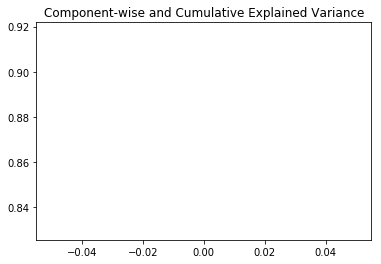

In [9]:
from sklearn.decomposition import PCA
#PCA数据降维
pca = PCA(n_components=num_of_col)  # n_components：目标维度
pca.fit(X)
#降维后数据
new_X = pca.fit_transform(X)

new_df=pd.DataFrame(np.c_[new_X,Y],columns=col_name)
writer = pd.ExcelWriter(os.path.join(drd_path,'data_PCA.xlsx'))
new_df.to_excel(writer,'Sheet1',index=False)
writer.save()
print('generated data:',new_X.shape)

print(pca.explained_variance_ratio_)  #输出贡献率
print(pca.explained_variance_)  # 输出方差值，方差值越大，表明越重要
print(pca.n_features_)
#print(pca.n_features_in_)
plt.plot(range(num_of_col), pca.explained_variance_ratio_)
plt.plot(range(num_of_col), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

## 线性降维方法：
### LDA降维（线性判别分析）
是有监督的线性分类器： fit()

LDA与PCA最大区别：最大化类间样本的方差，最小化类内样本的方差

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA( n_components=num_of_col).fit(X, Y)
new_X = lda.transform(X)

new_df=pd.DataFrame(np.c_[new_X,Y],columns=col_name)
writer = pd.ExcelWriter(os.path.join(drd_path,'data_LDA.xlsx'))
new_df.to_excel(writer,'Sheet1',index=False)
writer.save()
print('generated data:',new_X.shape)
print(lda.explained_variance_ratio_)

generated data: (4141, 1)
[0.83598521]


## 基于特征值的非线性降维方法（流型学习）：
### LLE 局部线性嵌入
局部线性嵌入(Locally Linear Embedding，以下简称LLE)，也是流形学习算法，LLE关注于降维时保持样本局部的线性关系，由于LLE在降维时保持了样本的局部关系，它广泛的用于图像图像识别，高维数据可视化等领域。

In [ ]:
#delete

from sklearn import manifold
#se = manifold.SpectralEmbedding(n_components=num_of_col, n_neighbors=10)
#Y = se.fit_transform(X)
new_X, err = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=num_of_col)
print("Done. Reconstruction error: %g" % err)

new_df=pd.DataFrame(np.c_[new_X,Y],columns=col_name)
writer = pd.ExcelWriter(os.path.join(drd_path,'data_LLE.xlsx'))
new_df.to_excel(writer,'Sheet1',index=False)
writer.save()
print('generated data:',new_X.shape)

### t-SNE
n_components应该小于4，因为它依赖于四叉树或oct树。

generated data: (4141, 1)


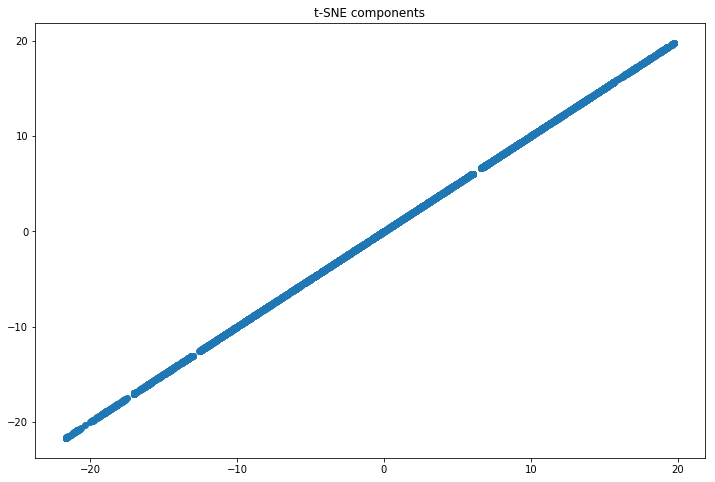

In [11]:
from sklearn.manifold import TSNE 
cols=3 if num_of_col>3 else num_of_col
new_X = TSNE(n_components=cols, n_iter=300).fit_transform(X)

new_df=pd.DataFrame(np.c_[new_X,Y],columns=col_name)
writer = pd.ExcelWriter(os.path.join(drd_path,'data_tSNE.xlsx'))
new_df.to_excel(writer,'Sheet1',index=False)
writer.save()
print('generated data:',new_X.shape)

if num_of_col<=3:
    plt.figure(figsize=(12,8))
    plt.title('t-SNE components')
    tsne=new_X
    for i in range(num_of_col):
        plt.scatter(tsne[:,i], tsne[:,(i+1)%num_of_col])

### ISOMAP流形学习
流形学习是非线性降维的主要方法，是MDS在流形学习上的扩展，将非欧几里德空间转换从欧几里德空间

使用的参数：

n_neighbors：决定每个点的相邻点数

n_components：决定流形的坐标数

n_jobs = -1：使用所有可用的CPU核心

In [12]:
from sklearn.manifold import Isomap
new_X= Isomap(n_neighbors=5, n_components=num_of_col, n_jobs=-1).fit_transform(X)

new_df=pd.DataFrame(np.c_[new_X,Y],columns=col_name)
writer = pd.ExcelWriter(os.path.join(drd_path,'data_ISOMAP.xlsx'))
new_df.to_excel(writer,'Sheet1',index=False)
writer.save()
print('generated data:',new_X.shape)

generated data: (4141, 1)


### MDS降维（多维标度法）

In [13]:
from sklearn.manifold import MDS
mds = MDS( n_components=num_of_col, metric=True)
new_X = mds.fit_transform(X)

new_df=pd.DataFrame(np.c_[new_X,Y],columns=col_name)
writer = pd.ExcelWriter(os.path.join(drd_path,'data_MDS.xlsx'))
new_df.to_excel(writer,'Sheet1',index=False)
writer.save()
print('generated data:',new_X.shape)

generated data: (4141, 1)


## 无监督：
### 独立成分分析法（ICA）
是基于信息理论的一种常用的降维方法，其与PCA主要的不同是PCA是寻找不相关的变量，而ICA是挑选独立变量。如果两个变量不相关，它们之间就没有线性关系。如果它们是独立的，它们就不依赖于其他变量。同时PCA主要对于高斯分布数据比较有效，而ICA适用于其他分布。我们可以调用sklearn中的FastICA函数来进行数据独立成分分析。

In [14]:
from sklearn.decomposition import FastICA
#独立分量分析（ICA）PCA和ICA之间的主要区别在于，PCA寻找不相关的因素，而ICA寻找独立因素。
ICA = FastICA(n_components=num_of_col, random_state=12)
new_X = ICA.fit_transform(X)

new_df=pd.DataFrame(np.c_[new_X,Y],columns=col_name)
writer = pd.ExcelWriter(os.path.join(drd_path,'data_ICA.xlsx'))
new_df.to_excel(writer,'Sheet1',index=False)
writer.save()
print('generated data:',new_X.shape)

generated data: (4141, 1)


### LE 拉普拉斯特征映射

In [ ]:
from sklearn.manifold import SpectralEmbedding
se = SpectralEmbedding(n_components=num_of_col, n_neighbors=10)
new_X = se.fit_transform(X)
new_df=pd.DataFrame(np.c_[new_X,Y],columns=col_name)
writer = pd.ExcelWriter(os.path.join(drd_path,'data_LE.xlsx'))
new_df.to_excel(writer,'Sheet1',index=False)
writer.save()
print('generated data:',new_X.shape)